<a href="https://colab.research.google.com/github/Mihail-Chr/projects/blob/main/ab_test_ver_all_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from scipy.stats import binom,norm,poisson
from math import factorial,exp,sqrt
from statsmodels.stats.weightstats import ttest_ind


sns.set_palette('pastel')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format


# Настройки отображения
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('mode.chained_assignment', None)
#plt.style.use('seaborn')
sns.set_palette('pastel')

# Константы
DATA_PATHS = {
    'users': '/content/drive/MyDrive/data/users_go.csv',
    'rides': '/content/drive/MyDrive/data/rides_go.csv',
    'subscriptions': '/content/drive/MyDrive/data/subscriptions_go.csv'
}

In [23]:
db_keys = DATA_PATHS.keys()
alpha = 0.05 # уровень статистической значимости
fee = 190 #стоимость месячной подписки

Загрузка данных...

Информация о данных:

users:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra


<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB

rides:


,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB

subscriptions:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes

Анализ пользователей...


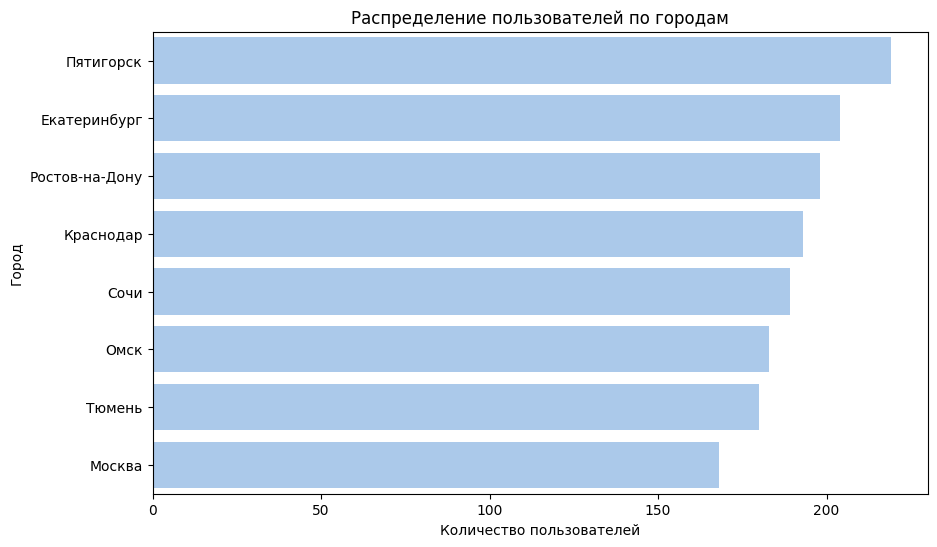

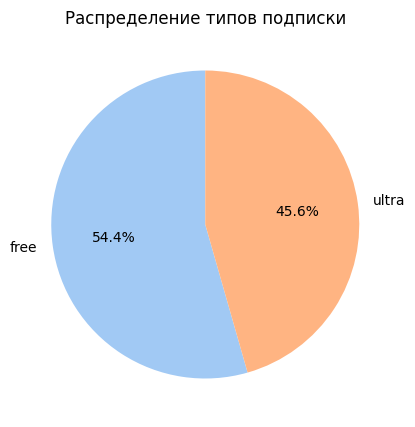

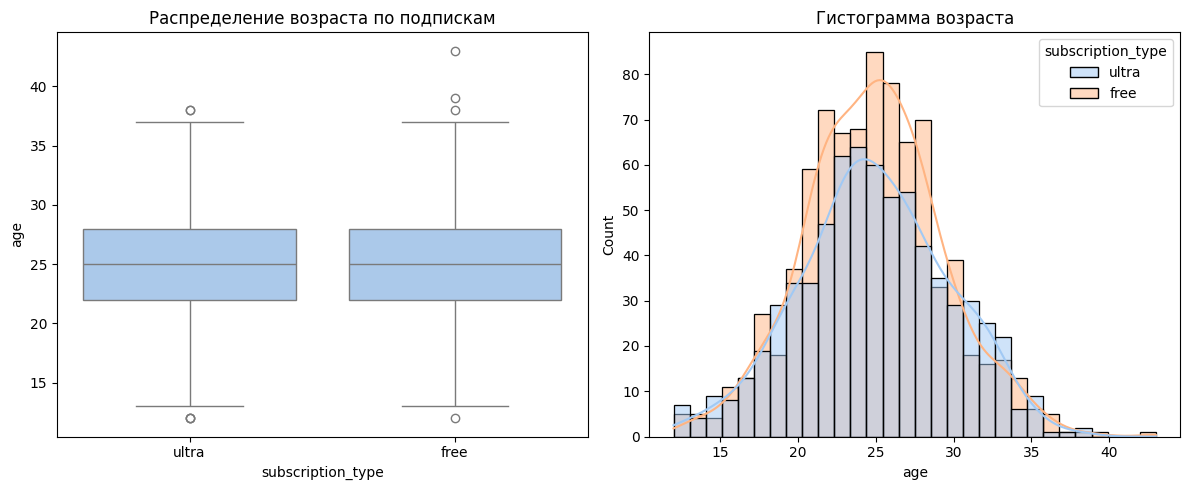


Анализ поездок...

Основные статистики поездок:


,distance,duration
count,"18,068.00","18,068.00"
mean,"3,070.66",17.81
std,"1,116.83",6.09
min,0.86,0.50
25%,"2,543.23",13.60
50%,"3,133.61",17.68
75%,"3,776.22",21.72
max,"7,211.01",40.82


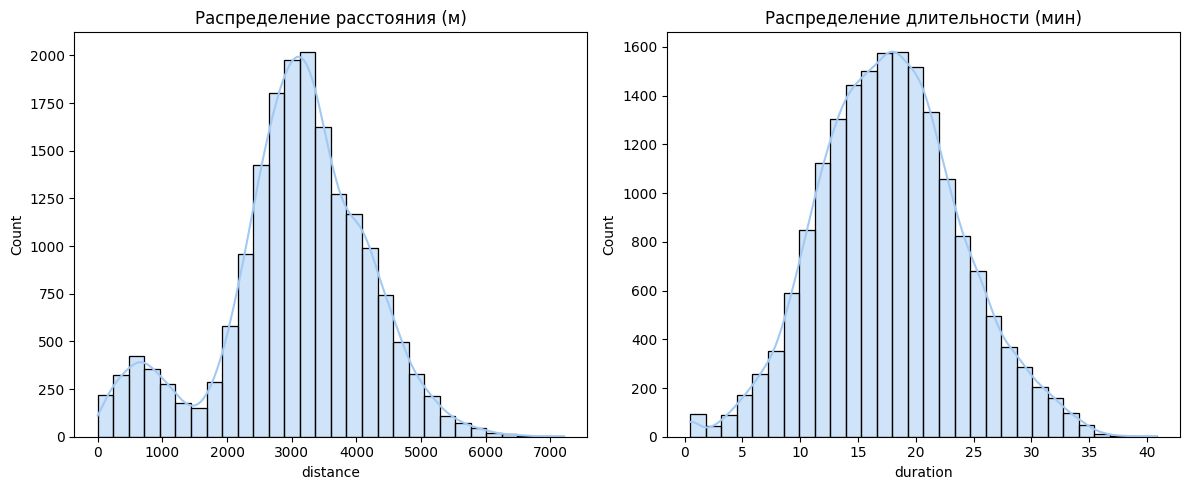

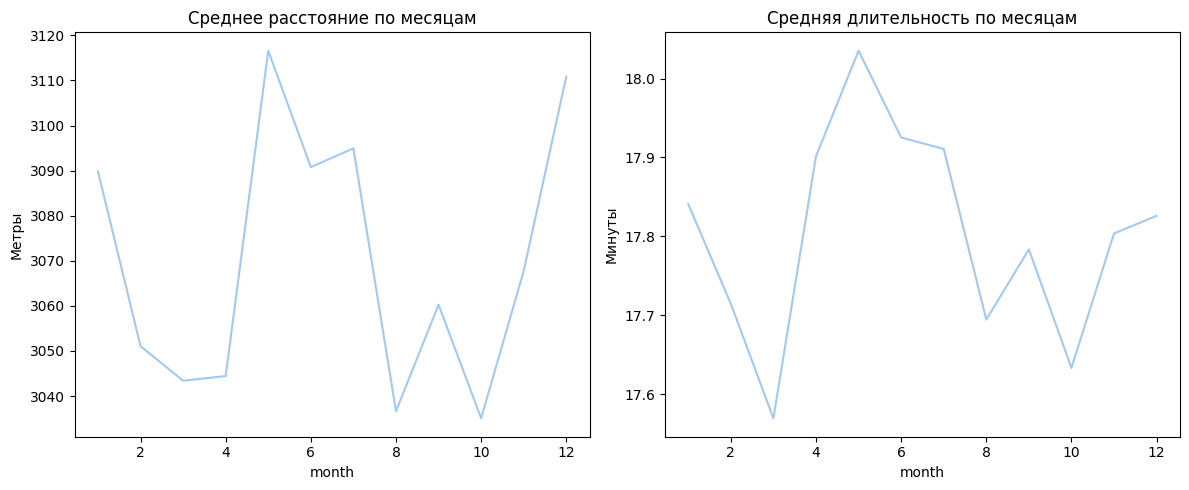


Объединение данных...

Расчет выручки...


sum           count       total_ultra total_free  \
subscription_type       free     ultra  free ultra                          
date                                                                        
1                 189,906.55 64,773.11  1001   584  175,733.11 189,906.55   
2                 162,458.68 52,705.04   868   468  141,625.04 162,458.68   
3                 183,366.77 62,098.71   983   561  168,688.71 183,366.77   
4                 181,720.27 61,279.21   955   551  165,969.21 181,720.27   
5                 184,063.82 66,874.34   963   597  180,304.34 184,063.82   
6                 188,132.27 62,978.24   988   565  170,328.24 188,132.27   
7                 181,348.13 64,114.23   955   574  173,174.23 181,348.13   
8                 183,110.80 60,502.32   978   540  163,102.32 183,110.80   
9                 189,699.46 57,165.56  1002   515  155,015.56 189,699.46   
10                177,562.71 58,356.42   946   529  158,866.42 177,562.71   
11                175,382.28 54,661.24   926   492  148,141.24 175,382.28   
12                191,072.58 57,629.00  1003   524  157,189.00 191,072.58   

                  cost_one_ride_free cost_one_ride_ultra  
subscription_type                                         
date                                                      
1                             189.72              300.91  
2                             187.16              302.62  
3                             186.54              300.69  
4                             190.28              301.21  
5                             191.14              302.02  
6                             190.42              301.47  
7                             189.89              301.70  
8                             187.23              302.04  
9                             189.32              301.00  
10                            187.70              300.31  
11                            189.40              301.10  
12                            190.50              299.98

Общая выручка за год по всем клиентам ULTRA  1958137.4213494274 рублей
Общая выручка за год по всем клиентам FREE  2187824.31013556 рублей
Общая выручка за год по всем клиентам 4145961.731484988 рублей


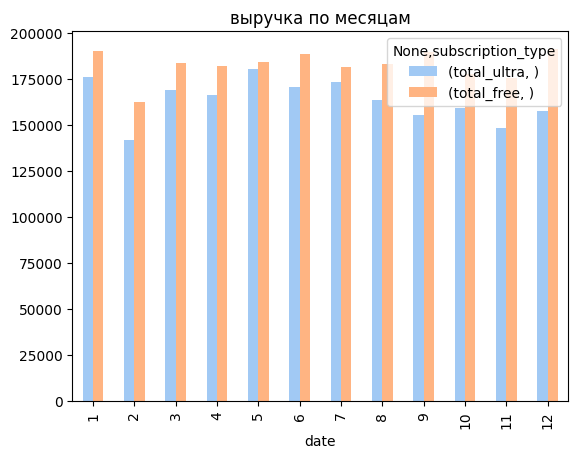

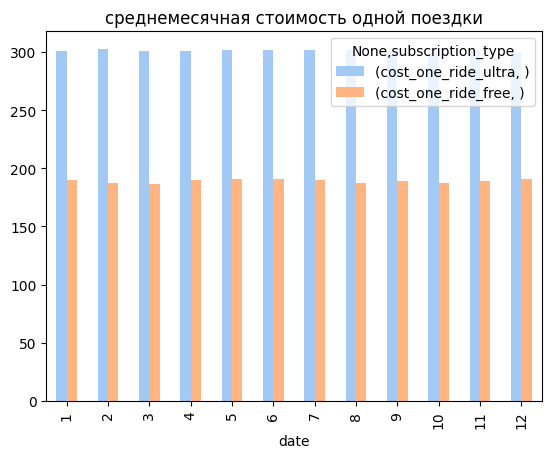

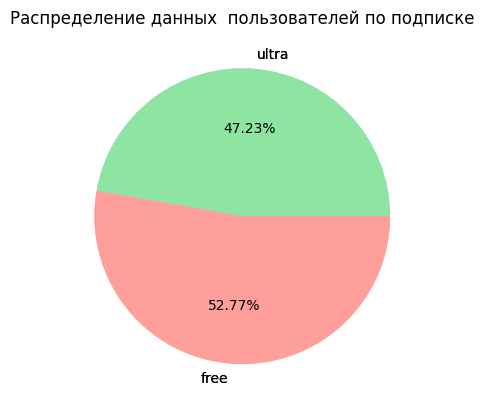


Анализ завершен!

Проверка гипотез

Объединение данных...

2.1 Время поездок (ultra > free): p-value = 1.0000
Не получилось отвергнуть нулевую гипотезу
2.2 Расстояние (ultra <= 3130м): p-value = 0.0805
Не получилось отвергнуть нулевую гипотезу
2.3 Ежемесячная выручка  (ultra <= free): p-value = 0.5000
Не получилось отвергнуть нулевую гипотезу

Распределения 


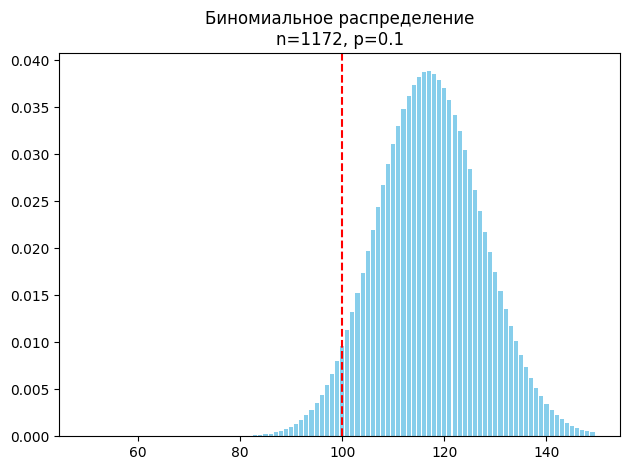


3. Требуемое количество промокодов: 1172


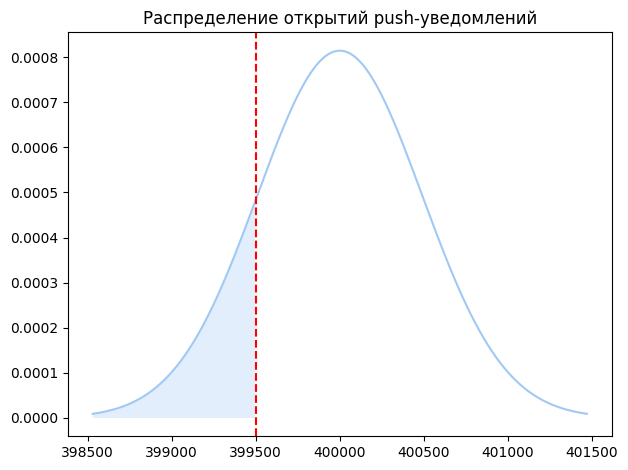


4. Вероятность ≤399,500 открытий: 15.4%
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [24]:
# Класс для анализа данных
class BikeShareAnalysis:
    def __init__(self):
        self.data = {}
        self.merged_data = None
        self.monthly_data = None


    def load_data(self):
        """Загрузка и предварительная обработка данных"""
        print("Загрузка данных...")
        self.data['users'] = pd.read_csv (DATA_PATHS['users']).drop_duplicates()
        self.data['rides'] = pd.read_csv(DATA_PATHS['rides'])
        self.data['subscriptions'] = pd.read_csv(DATA_PATHS['subscriptions'])
        #for ind in db_keys:
        #    if ind == 'users': self.data[ind] = pd.read_csv(DATA_PATHS[ind]).drop_duplicates()
        #    else : self.data[ind] = pd.read_csv(DATA_PATHS[ind])

        # Преобразование данных
        self.data['rides']['date'] = pd.to_datetime(self.data['rides']['date'])
        self.data['rides']['month'] = self.data['rides']['date'].dt.month

        print("\nИнформация о данных:")
        for name, df in self.data.items():
            print(f"\n{name}:")
            display(df.head(3))
            df.info()

    def merge_data(self):

        """Объединение данных для комплексного анализа"""
        print("\nОбъединение данных...")
        self.merged_data = pd.merge(
            self.data['rides'],
            self.data['users'],
            on='user_id',
            how='left'
        )

        self.merged_data = pd.merge(
            self.merged_data,
            self.data['subscriptions'],
            on='subscription_type',
            how='left'
        )

        # Расчет стоимости поездки
        self.merged_data['ride_cost'] = (
            self.merged_data['duration'] * self.merged_data['minute_price'] +
            self.merged_data['start_ride_price']
        )
        return self.merged_data

    def prepare_monthly_data(self):

        """Группировка данных помесячно"""

        monthly = self.merged_data.groupby(
            [self.merged_data['date'].dt.month, 'subscription_type'])['ride_cost'].agg(['sum','count']).unstack()
        monthly['total_ultra'] = monthly['sum']['ultra'] + monthly['count']['ultra']*fee
        monthly['total_free'] = monthly['sum']['free']
        monthly['cost_one_ride_free'] = monthly['total_free']/monthly['count']['free']
        monthly['cost_one_ride_ultra'] = monthly['total_ultra']/monthly['count']['ultra']
        self.monthly_data = monthly
        return  monthly

    def analyze_users(self):
        """Анализ данных пользователей"""
        print("\nАнализ пользователей...")
        users = self.data['users']

        # 1. Распределение по городам
        plt.figure(figsize=(10, 6))
        city_dist = users['city'].value_counts()
        sns.barplot(x=city_dist.values, y=city_dist.index)
        plt.title('Распределение пользователей по городам')
        plt.xlabel('Количество пользователей')
        plt.ylabel('Город')
        plt.show()

        # 2. Распределение подписок
        plt.figure(figsize=(8, 5))
        sub_dist = users['subscription_type'].value_counts()
        plt.pie(sub_dist, labels=sub_dist.index, autopct='%1.1f%%', startangle=90)
        plt.title('Распределение типов подписки')
        plt.show()

        # 3. Возрастные характеристики
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(x='subscription_type', y='age', data=users)
        plt.title('Распределение возраста по подпискам')

        plt.subplot(1, 2, 2)
        sns.histplot(data=users, x='age', hue='subscription_type', kde=True)
        plt.title('Гистограмма возраста')
        plt.tight_layout()
        plt.show()

    def analyze_rides(self):
        """Анализ данных о поездках"""
        print("\nАнализ поездок...")
        rides = self.data['rides']

        # 1. Основные статистики
        print("\nОсновные статистики поездок:")
        display(rides[['distance', 'duration']].describe())

        # 2. Распределение расстояния и длительности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(rides['distance'], bins=30, kde=True)
        plt.title('Распределение расстояния (м)')

        plt.subplot(1, 2, 2)
        sns.histplot(rides['duration'], bins=30, kde=True)
        plt.title('Распределение длительности (мин)')
        plt.tight_layout()
        plt.show()

        # 3. Динамика по месяцам
        monthly_stats = rides.groupby('month')[['distance', 'duration']].mean()

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.lineplot(data=monthly_stats['distance'])
        plt.title('Среднее расстояние по месяцам')
        plt.ylabel('Метры')

        plt.subplot(1, 2, 2)
        sns.lineplot(data=monthly_stats['duration'])
        plt.title('Средняя длительность по месяцам')
        plt.ylabel('Минуты')
        plt.tight_layout()
        plt.show()

    def calculate_revenue(self):
        """Расчет выручки"""
        self.merge_data()
        self.prepare_monthly_data()
        print("\nРасчет выручки...")
        display(self.monthly_data)

        tot_ultra = self.monthly_data['total_ultra'].sum()
        tot_free = self.monthly_data['total_free'].sum()
        tot_all = tot_ultra + tot_free

        print ('\033[1m'+'Общая выручка за год по всем клиентам ULTRA ', tot_ultra,'рублей' +'\033[0m')
        print ('\033[1m'+'Общая выручка за год по всем клиентам FREE ',tot_free,'рублей' +'\033[0m')
        print ('\033[1m'+'Общая выручка за год по всем клиентам',tot_all,'рублей' +'\033[0m')



        # Визуализация
        self.monthly_data[['total_ultra','total_free']].plot.bar()
        plt.title('выручка по месяцам')
        plt.show()
        self.monthly_data[['cost_one_ride_ultra','cost_one_ride_free']].plot.bar()
        plt.title('среднемесячная стоимость одной поездки')
        plt.show()

        fig, ax = plt.subplots()
        labels = 'ultra', 'free'
        sizes = [tot_ultra ,tot_free]
        ax.pie(sizes, labels=labels, autopct='%1.2f%%')
        ax.pie(sizes, labels=labels)
        ax.set_title('Распределение данных  пользователей по подписке')
        plt.show()


    def test_hypotheses(self):
        """Проверка статистических гипотез"""
        # Разделение данных по подпискам
        if self.merged_data is None:
            self.merge_data
        merged = self.merge_data()
        #display(merged)
        if self.monthly_data is None:
            self.monthly_data
        monthly1 = self.monthly_data


        free_mask = merged['subscription_type']=='free'
        ultra_mask = ~free_mask

        # Гипотеза 1: Время поездок
        _, p_duration = st.ttest_ind(
            merged.loc[ultra_mask, 'duration'],
            merged.loc[free_mask, 'duration'],
            alternative='less'
        )

        # Гипотеза 2: Расстояние поездок
        _, p_distance = st.ttest_1samp(
            merged.loc[ultra_mask, 'distance'],
            3130
        )

        # Гипотеза 3: среднемесячная выручка
        _, p_monthly = st.ttest_ind(
            self.monthly_data['total_ultra'],
            self.monthly_data['total_free'],
            alternative='greater'
        )
        print(f"\n2.1 Время поездок (ultra > free): p-value = {p_duration:.4f}")
        if p_duration < alpha: print('Отвергаем нулевую гипотезу')
        else: print('Не получилось отвергнуть нулевую гипотезу')

        print(f"2.2 Расстояние (ultra <= 3130м): p-value = {p_distance /2:.4f}")
        if p_distance < alpha: print('Отвергаем нулевую гипотезу')
        else: print('Не получилось отвергнуть нулевую гипотезу')

        print(f"2.3 Ежемесячная выручка  (ultra <= free): p-value = {p_monthly /2:.4f}")
        if p_monthly < alpha: print('Отвергаем нулевую гипотезу')
        else: print('Не получилось отвергнуть нулевую гипотезу')

    @staticmethod
    def calculate_coupons(target=100.0, prob=0.1, confidence=0.95):
        """Расчет необходимого количества промокодов"""
        p1 = 0.1 # вероятность успеха
        max2 = 1500
        x1 = np.random.binomial(target , prob, max2)

        i=1000
        p=(1 - confidence)
        while p< binom.cdf(k= target , n= i , p= prob ):
            i=i+1
        n = i

        # Визуализация
        x = np.arange(max(0, target-50), target+50)
        #n = np.cail(n)
        plt.bar(x, binom.pmf(x, n, prob), color='skyblue')
        plt.axvline(target, color='red', linestyle='--')
        plt.title(f'Биномиальное распределение\nn={n}, p={prob}')
        plt.tight_layout()
        plt.show()

        return n

    @staticmethod
    def push_notification_prob(n=1_000_000, p=0.4, target=399_500):
        """Вероятность открытия push-уведомлений"""
        mean = n * p
        std = np.sqrt(n * p * (1 - p))
        prob = norm.cdf((target - mean) / std)

        # Визуализация
        x = np.linspace(mean - 3*std, mean + 3*std, 500)
        plt.plot(x, norm.pdf(x, mean, std))
        plt.axvline(target, color='red', linestyle='--')
        plt.fill_between(x, 0, norm.pdf(x, mean, std), where=(x <= target), alpha=0.3)
        plt.title('Распределение открытий push-уведомлений')
        plt.tight_layout()
        plt.show()

        return prob


    def run_analysis(self):
        """Запуск полного анализа"""
        self.load_data()
        self.analyze_users()
        self.analyze_rides()
        self.calculate_revenue()
        print("\nАнализ завершен!")

        print("\nПроверка гипотез")
        self.test_hypotheses()

        print("\nРаспределения ")

        # Промокоды

        coupons = self.calculate_coupons()
        print(f"\n3. Требуемое количество промокодов: {coupons}")

        # Push-уведомления
        prob = self.push_notification_prob()
        print(f"\n4. Вероятность ≤399,500 открытий: {prob:.1%}")





# Запуск анализа
if __name__ == '__main__':
    analyzer = BikeShareAnalysis()
    analyzer.run_analysis()